# Exploratory Data Analysis (EDA) & Data Cleaning

## Load Data

### Import Libraries

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Plot Style

In [47]:
sns.set_style("whitegrid")

### CSV File Variable

In [48]:
csv_file_path = '../data/raw/gym_members_exercise_tracking.csv'

### Load dataset into a pandas DF

In [5]:
try:
    df = pd.read_csv(csv_file_path)

except FileNotFoundError:
    print(f"Error: CSV file not found")
    df = pd.DataFrame() # Create an empty DataFrame to prevent errors in subsequent steps

## Initial Data Inspection (look at the data's characteristics)

### Display first 5 rows

In [51]:
df.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39


### DF Summary (data types and non-null values)

In [ ]:
df.info()

### Descriptive Statistics

In [ ]:
df.describe

### Check for unique values in categorical columns

#### df['column_name'].unique()

In [ ]:
df['Age'].unique()

In [ ]:
df["Workout_Type"].unique()

### Check Column Names

In [ ]:
df.columns.tolist()

## Data Cleaning

### Check for Missing Values

In [ ]:
df.isnull().sum()

### Check for Duplicate Rows

In [ ]:
df.duplicated().sum()

#### To remove them

In [ ]:
if df.duplicated().sum() > 0:
    df.drop_duplicates(inplace=True)

### To Correct Data Types (Based on df.info())

In [ ]:
# Example: If a column was incorrectly read, you would convert it like this:
df['Some_Numeric_Column'] = pd.to_numeric(df['Some_Numeric_Column'], errors='coerce')
# 'errors='coerce'' will turn non-convertible values into NaN.

## Feature Engineering (Creating New Columns)

### Create Age Group Catagories

#### This will give us the number of People in each age catagory (we will be using bins/lables with pd.cut)

In [53]:
# Bins for the range Age you target
bin_age = [18, 26, 36, 46, 56, df['Age'].max() + 1] # to ensure the last bin captures max age
# Labels names
label_age = ['18-25', '26-35', '36-45', '46-55', '56+']
# df[Column name] = pd.cut(df[Column name you target], bins = bin, Lables = lable, right = False)
df['Age_Group'] = pd.cut(df['Age'], bins=bin_age, labels=label_age, right=False) # right=False means [min, max)
# .vlaue_counts counts the occurrences of each unique then sort it with .sort_index()
print(df['Age_Group'].value_counts().sort_index())

Age_Group
18-25    191
26-35    211
36-45    241
46-55    242
56+       88
Name: count, dtype: int64


### This Create Weight Class based on BMI ranges 

#### (we will be using if/else with .apply())

In [54]:
def get_weight_class(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi < 25:
        return 'Normal Weight'
    elif 25 <= bmi < 30:
        return 'Overweight'
    else:
        return 'Obese'

df['Weight_Class'] = df['BMI'].apply(get_weight_class)
print(df['Weight_Class'].value_counts())

Weight_Class
Normal Weight    370
Overweight       243
Obese            192
Underweight      168
Name: count, dtype: int64


#### Challenge: do the opposite for each

In [7]:
# Create Age Group Catagories using (if/else)
def get_age_group(age):
    if  18 <= age < 26:
        return '18-25'
    elif 25 < age < 36:
        return '26-35'
    elif 35 < age < 46:
        return '36-45'
    elif 45 < age < 56:
        return '46-55'
    elif age >= 56:
        return '56+'
    else:
        return 'Under 18'
    
df['Age_Group'] = df['Age'].apply(get_age_group)
print(df['Age_Group'].value_counts())

Age_Group
46-55    242
36-45    241
26-35    211
18-25    191
56+       88
Name: count, dtype: int64


In [35]:
# Create Weight Class using(pd.cut())
bin_weight = [0, 18.5, 25, 30, df['BMI'].max() + 1]
labels_weight = ['Underweight', 'Normal Weight', "Overweight", 'Obese']
df["Weight_Class"] = pd.cut(df['BMI'], bins = bin_weight, labels=labels_weight, right=False)
print(df['Weight_Class'].value_counts().sort_index())

Weight_Class
Underweight      168
Normal weight    370
Overweight       243
Obese            192
Name: count, dtype: int64


### BMP ZONE

In [55]:
def get_bpm_zone(avg_bpm):
    if avg_bpm < 125:
        return 'Low Intensity'
    elif 125 <= avg_bpm < 150:
        return 'Moderate Intensity'
    else:
        return 'High Intensity'
    
df['BPM_Zone'] = df['Avg_BPM'].apply(get_bpm_zone)
print(df['BPM_Zone'].value_counts().sort_index())
df['Avg_BPM'].min()

BPM_Zone
High Intensity        370
Low Intensity          91
Moderate Intensity    512
Name: count, dtype: int64


np.int64(120)

## Exploratory Data Analysis (EDA)

### Answer questions via Visualizations

#### Question 1: What is the age and gender distribution of the gym members?

C:\Users\Ziyad\AppData\Local\Temp\ipykernel_25716\802443221.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=df, palette='viridis')


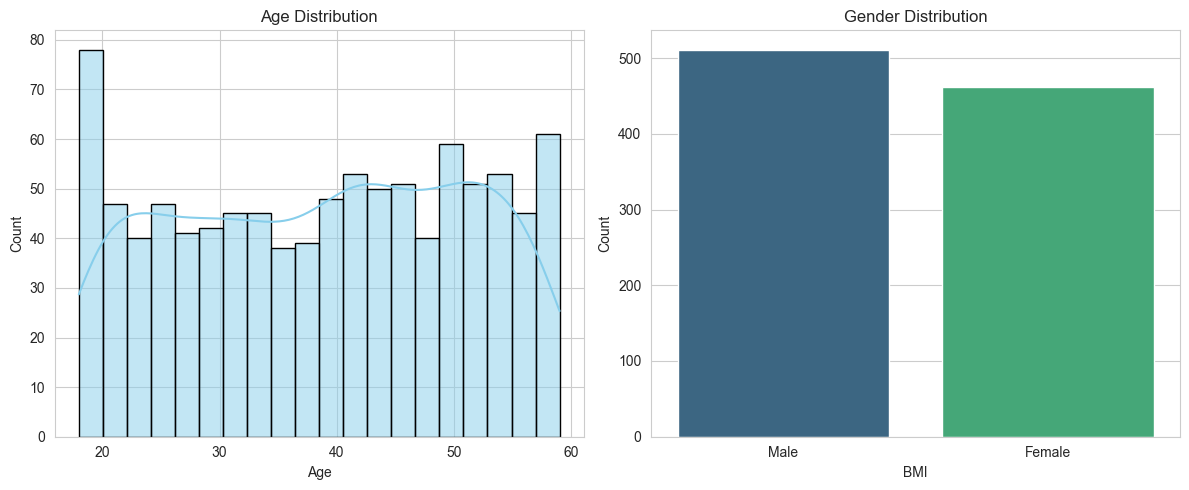

In [56]:
plt.figure(figsize=(12, 5)) #define figure size

# create a grid of plots within your figure
plt.subplot(1,2,1) #define subplot (no rows, no columns, 1st plot)
# create a histogram of the age column
sns.histplot(df['Age'], bins=20, color='skyblue', edgecolor='black', kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')

plt.subplot(1,2,2) #define subplot (no rows, no columns, 2st plot)
# Creates a bar plot counting occurrences of each gender (culomn, data, color)
sns.countplot(x='Gender', data=df, palette='viridis')
plt.title('Gender Distribution')
plt.xlabel('BMI')
plt.ylabel('Count')

plt.tight_layout() #Automatically adjusts spacing between subplots to prevent overlap
plt.show()

#### Observation:
he gym has a diverse age range among its members, with a notable presence of both younger adults (18-20) and a more mature demographic (early 50s). The gender distribution is quite balanced, with a slight lean towards male members.

#### Question 2: How many calories do members burn on average per session? Which workout type burns the most calories?

C:\Users\Ziyad\AppData\Local\Temp\ipykernel_25716\1415984365.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=calories_by_workout.index, y=calories_by_workout.values, palette='plasma')


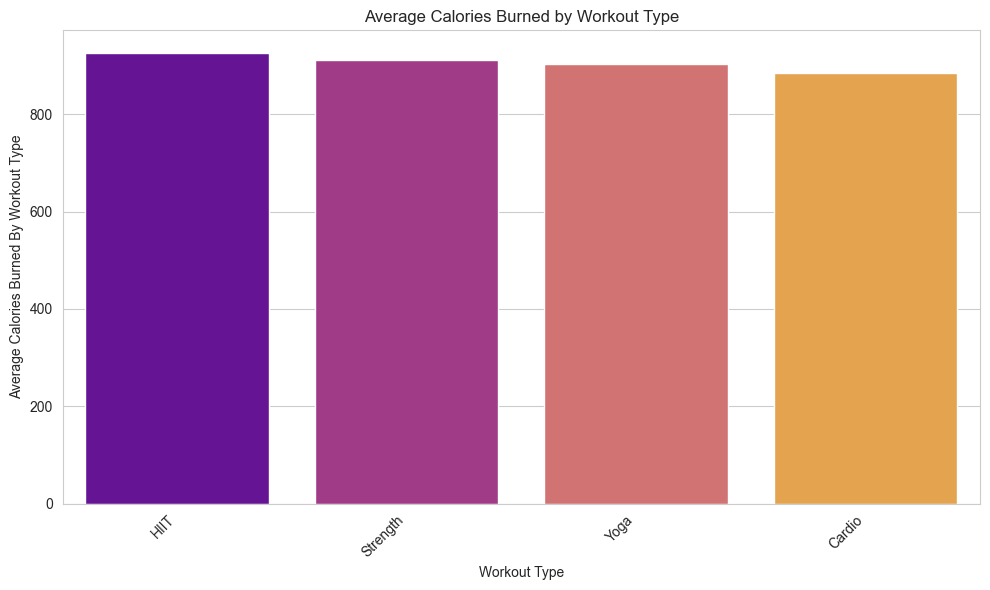

In [57]:
#1 calculate the average calories burned
avg_calories_burned = df['Calories_Burned'].mean()
#2 calculate the average clories burned by workout type
calories_by_workout = df.groupby('Workout_Type')['Calories_Burned'].mean().sort_values(ascending=False)
calories_by_workout
plt.figure(figsize=(10, 6))
sns.barplot(x=calories_by_workout.index, y=calories_by_workout.values, palette='plasma')
plt.title('Average Calories Burned by Workout Type')
plt.xlabel('Workout Type')
plt.ylabel('Average Calories Burned By Workout Type')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### Question 3: Do members with a higher experience level (Experience_Level 3) indeed have a lower average fat percentage compared to less experienced members?

C:\Users\Ziyad\AppData\Local\Temp\ipykernel_25716\3129863159.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fat_by_experience.index, y=fat_by_experience.values, palette='coolwarm')


<function matplotlib.pyplot.show(close=None, block=None)>

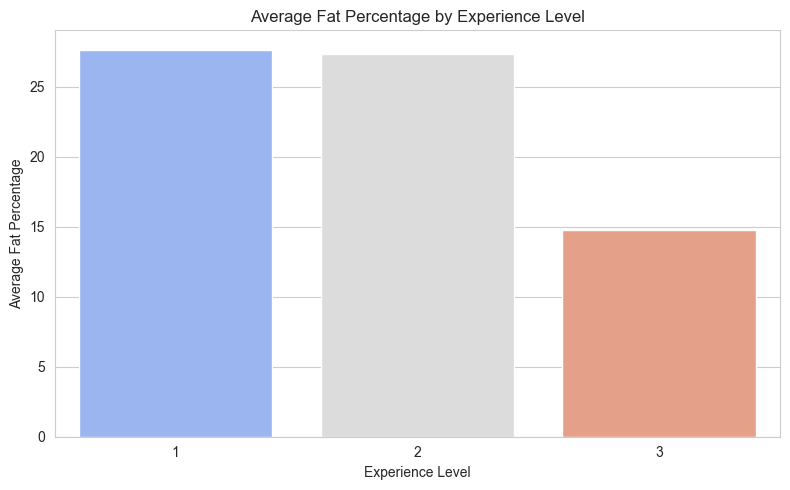

In [58]:
fat_by_experience = df.groupby('Experience_Level')['Fat_Percentage'].mean().sort_values()

plt.figure(figsize=(8, 5))
sns.barplot(x=fat_by_experience.index, y=fat_by_experience.values, palette='coolwarm')
plt.title('Average Fat Percentage by Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Average Fat Percentage')
plt.tight_layout()
plt.show

#### Relationship between Session_Duration and Calories_Burned

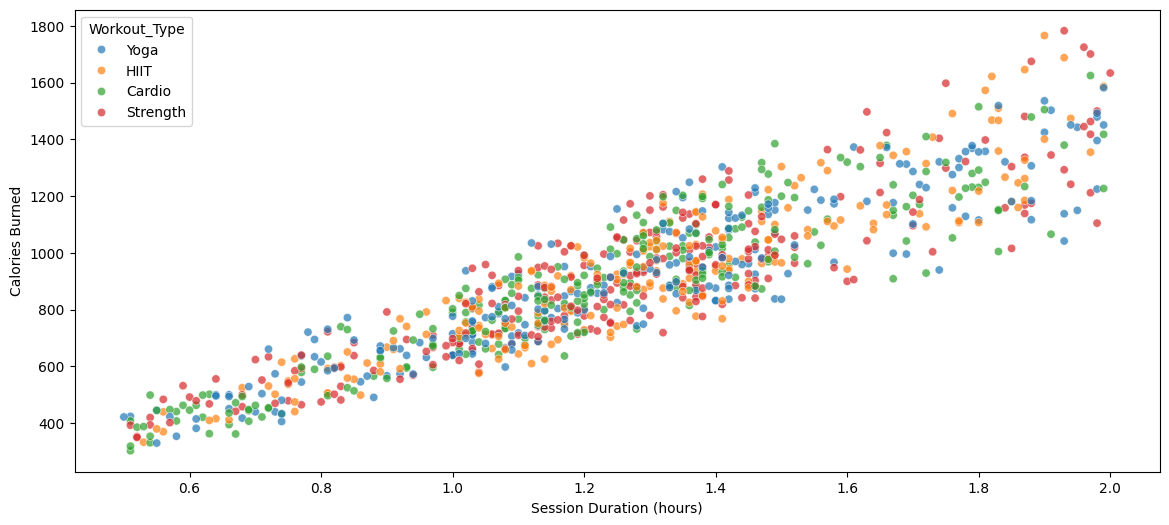

In [40]:
plt.figure(figsize=(14,6))
sns.scatterplot(data=df, x='Session_Duration (hours)', y='Calories_Burned', hue='Workout_Type', alpha=0.7 )
plt.xlabel('Session Duration (hours)')
plt.ylabel('Calories Burned')
plt.show()

#### Differences in workout habits between Male and Female members:

C:\Users\Ziyad\AppData\Local\Temp\ipykernel_25716\677904536.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = df, x='Gender' , y='Calories_Burned', estimator=sum, palette='pastel')
C:\Users\Ziyad\AppData\Local\Temp\ipykernel_25716\677904536.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = df, x='Gender', y='Session_Duration (hours)', estimator=sum, palette='pastel')


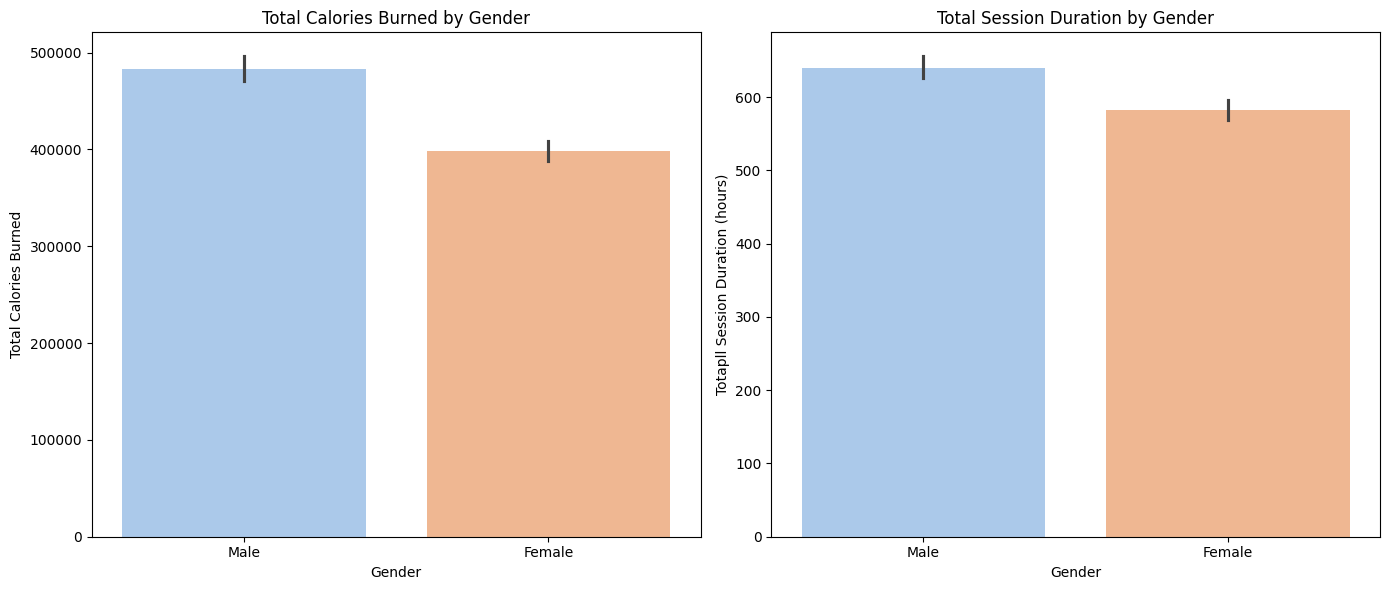

In [44]:
plt.figure(figsize=(14,6))

plt.subplot(1, 2, 1)
sns.barplot(data = df, x='Gender' , y='Calories_Burned', estimator=sum, palette='pastel')
plt.title('Total Calories Burned by Gender')
plt.ylabel('Total Calories Burned')

plt.subplot(1, 2, 2)
sns.barplot(data = df, x='Gender', y='Session_Duration (hours)', estimator=sum, palette='pastel')
plt.title('Total Session Duration by Gender')
plt.ylabel('Totapll Session Duration (hours)')

plt.tight_layout()
plt.show()

#### Correlation Matrix of Numerical Features:

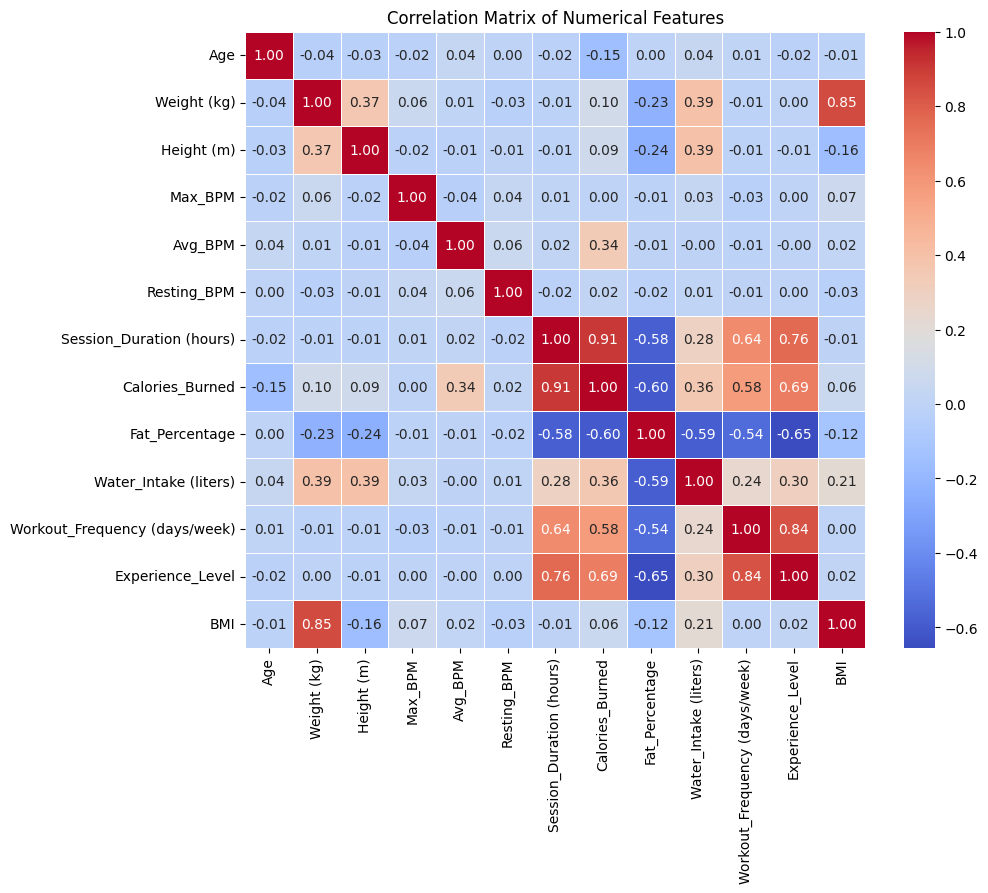

In [46]:
# Select only numerical columns for correlation
numerical_cols = df.select_dtypes(include=['float64','int64']).columns
correlation_matrix = df[numerical_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

Take aways:

1- Strong Positive Correlation: Session_Duration (hours) and Calories_Burned (0.91) // the longer the session is the more calories are burned

2- Strong Positive Correlation: Workout_Frequency (days/week) and Experience_Level (0.84) // trainers with higher experience usually workout more frequently

3- Strong Positive Correlation: BMI and Weight (kg) (0.85) // higher BMI, higher weight

4- Strong Negative Correlation: Session_Duration (hours) and Fat_Percentage (-0.60) // longer workout session have tend to have lower fat percentage

5- Strong Negative Correlation: Experience_Level and Fat_Percentage (-0.65) // higher experience tend to have lower fat percentage


### Save Cleaned and Engineered Data

In [62]:
# Define the path for the cleaned data
cleaned_csv_path = '../data/processed/cleaned_gym_members_data.csv'

# Save the DataFrame to a new CSV file
df.to_csv(cleaned_csv_path, index=False)
print(f"\nCleaned and engineered data saved to: {cleaned_csv_path}")
df.head()


Cleaned and engineered data saved to: ../data/processed/cleaned_gym_members_data.csv


,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI,Age_Group,Weight_Class,BPM_Zone
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20,56+,Obese,High Intensity
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00,46-55,Obese,High Intensity
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71,26-35,Normal Weight,Low Intensity
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41,18-25,Underweight,High Intensity
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39,36-45,Underweight,High Intensity
